to-do: far vedere come varia l'embedding al variare di k, magari fare un breve video con le immagini in sequenza
<h1 style="text-align: center;">ISOMAP</h1>

*(Joshua B. Tenenbaum, Vin de Silva, John C. Langford - 2000)*

ISOMAP è un metodo non-lineare di riduzione della dimensionalità.<br>
Calcola in modo efficiente un embedding a bassa dimensionalità di un insieme di punti ad alta dimensionalità.

L'assunzione di base che facciamo sul dataset a cui applichiamo l'algoritmo è che, anche se i suoi punti sono in uno spazio con molte dimensioni, al loro interno si celi una struttura rappresentabile in uno spazio con molte meno dimensioni.

<img src="media/hand-head.png" alt="hand-head"/>
<p style="text-align: center;"><i>Esempio di riduzione a 2 dimensioni di immagini in 4096 dimensioni (64x64 pixel)</i></p>


L'embedding, che possiamo immaginare come un "appiattimento" del manifold, deve preservare le distanze fra i punti.

L'intuizione alla base di ISOMAP è che in small local regions del manifold le distanze geodesiche fra punti sono ben approssimate dalla loro distanza euclidea.<br>
Per punti lontani invece la distanza euclidea non è adatta, suggerirebbe distanze minori di quelle che effettivamente avremmo percorrendo il manifold.

<img src="media/swiss.png" alt="swiss" width="400"/>
<p style="text-align: center;"><i>Esempio di distanza euclidea (tratteggiata) e distanza geodesica (piena) fra due punti di uno swiss roll</i></p>

## Algoritmo

Input :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ X $ (ad alta dimensionalità)<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
una funzione di distanza $d\left ( x_{i},x_{j} \right )$, scegliamo la distanza euclidea


1) <b>Troviamo i neighbors $ N_{i} $  di ogni punto $ x_{i} $ </b> con una delle seguenti strategie

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
k-nearest neighbors $ \rightarrow \left | N_{i} \right |=k  $<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
fixed radius $ \rightarrow \left | N_{i} \right |= \left \{ j\:|\left \| x_{j}-x_{i} \right \|\leq r \right \} $

2) <b>Uniamo i neighbors $ N_{i} $ a $ x_{i} $  con archi di peso</b> $w_{ij}=\left \| x_{j}-x_{i} \right \|,\:\forall j\in N_{i}$ (distanze <b>locali</b>)<br>&nbsp;&nbsp;&nbsp;&nbsp; creando così un <b>grafo connesso</b> in cui valga la disuguaglianza triangolare

3) <b>Ricaviamo la matrice di distanze $ D $ </b> calcolando le distanze (<b>geodesiche</b>) $ d_{sp} $ dei cammini minimi fra tutte le coppie di punti<br>&nbsp;&nbsp;&nbsp;&nbsp; usando l'algoritmo di Dijkstra o di Floyd-Warshall

4) <b>Applichiamo metric MDS con $ D $ come input per ottenere $ X $ </b>(a bassa dimensionalità),<br>&nbsp;&nbsp;&nbsp;&nbsp; cioè un embedding del dataset che preserva le distanze geodesiche

<img src="media/swiss_knn.png" alt="swiss" width="400"/>
<p  style="text-align: center;"><i>Esempio di grafo costruito su uno swiss roll</i></p>

<br>

Abbiamo la garanzia teorica che con $ x_{i},...,x_{n} $ campioni presi uniformemente da un manifold "buono", per $ n\rightarrow \infty $ e $ k\approx \log n $ ,<br> i cammini minimi sul grafo pesato convergono alle distanze geodesiche fra i campioni.

La complessita di ISOMAP é $ O\,[D\,log (k)\,N\,log(N)]+O\,[N^{2}\,(k+log(N))]+O\,[dN^{2}] $

Un problema dell'algoritmo è che in presenza di <b>buchi nel manifold</b> le distanze fra punti, calcolate come cammini minimi,<br> tendono a sovrastimare le reali distanze geodesiche.
<img src="media/holes.png" alt="swiss" width="400"/>
<p style="text-align: center;"><i>Esempio di stima delle distanze distorta a causa di buchi nel manifold</i></p>

## Multidimensional scaling (MDS) <br>

Questo problema di embedding è chiamato <b>(metric) multi-dimensional scaling</b>:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Data $ D\in \mathbb{R}^{n\times n}\:,\:d_{ij}=\left \| x_{i}-x_{j} \right \| $ , ricava i punti $ (x_{i})_{i\,=\,1...n}\in \mathbb{R}^{d} $

Più generalmente il problema è:<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Dati gli oggetti $ x_{1},...,x_{n} \in X $ (ad alta dimensionalità), trova un embedding $ \Phi : X \to \mathbb{R}^{d}\:\:|\:\:\left \| \Phi(x_{i})-\Phi(x_{j}) \right \| = d_{ij} $<br>

Per una generale $ D $ , <b>non possiamo</b> ottenere un tale embedding <b>senza distorsione</b> dei dati.

<br>

#### Classic MDS

Data una $ D $ di <b>distanza euclidee</b> possiamo esprimere in termini di entrate di $ D $ la <b>matrice di Gram $ S $</b> con entrate $ s_{ij}=(\left \langle x_{i},x_{j} \right \rangle)_{\:i,j\:=\:1...n} $ in questo modo:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ d_{ij}^{\:2}=\left \| x_{i}-x_{j} \right \|^{2}=\left \langle x_{i}-x_{j}\:,\:x_{i}-x_{j} \right \rangle = \left \langle x_{i},x_{i} \right \rangle + \left \langle x_{j},x_{j} \right \rangle -2 \left \langle x_{i},x_{j} \right \rangle $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ s_{ij}=\left \langle x_{i},x_{j} \right \rangle = \frac{1}{2}(\:\left \langle x_{i},x_{i} \right \rangle + \left \langle x_{j},x_{j} \right \rangle - d_{ij}^{\:2}\:)=\frac{1}{2}(\: d\,(0,x_{i})^{2}+d\,(0,x_{j})^{2} - d_{ij}^{\:2}\:)=\frac{1}{2}(\: d_{1i}^{\:2}+d_{1j}^{\:2} - d_{ij}^{\:2}\:) $

$ S $ è una matrice definita positiva, perciò possiamo decomporla nella forma $ S=X X^{T}\:,\: X \in \mathbb{R}^{n\times d} $

<b>L' $i$-esima riga di $ X $ sarà l'embedding del punto $ x_{i} $ in $ \mathbb{R}^{d} $ </b>

Per trovare $ X $ calcoliamo la decomposizione spettrale di $ S=V\Lambda V^{T} $ e poniamo $ X=V\sqrt{\Lambda} $

Tipicamente, scegliamo una dimensione $ d\leq n $ e poniamo:
* $V_{d}$ uguale alle prime $ d $ colonne di $ V $
* $\Lambda_{d}$ uguale alla matrice diagonale $ d \times d $ con i primi $ d $ autovalori sulla diagonale
* $ X=V_{d}\sqrt{\Lambda_{d}}$

<br>

#### Metric MDS

Se $ D $ non è di sole distanze euclidee non riusciremo a ricavare un embedding perfetto.<br>
Perciò definiamo una funzione di <b>stress</b>, ad esempio:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ stress(embedding)=\sqrt{\sum_{i=1}^{n}\sum_{j=1\:|\:i\neq j}^{n}(\left \| x_{i}-x_{j} \right \|-d_{ij})^2 } $ </p>

Cercheremo di trovare un embedding $ x_{1},...,x_{n} $ che minimizzi lo stress tramite un algoritmo di ottimizzazione non convessa (es. discesa del gradiente).

<br>

##### Fonti:

- [J. Tenenbaum, V. de Silva and J. Langford - A global geometric framework for nonlinear dimensionality reduction](http://wearables.cc.gatech.edu/paper_of_week/isomap.pdf "ISOMAPpaper")
- [lezione su ISOMAP di Ulrike von Luxburg (tratta dal Master in Machine Learning dell'Università di Tübingen)](https://www.youtube.com/watch?v=PNcxAbZX5X0 "ISOMAPvideo")
- [lezione su MDS di Ulrike von Luxburg (tratta dal Master in Machine Learning dell'Università di Tübingen)](https://www.youtube.com/watch?v=tJBVC2kzPCY "MDSvideo1")
- [lezione su MDS di Michael Pyrcz, professore dell'Università del Texas a Austin](https://www.youtube.com/watch?v=Yt0o8ukIOKU "MDSvideo2")

***

## Applicazione di ISOMAP al dataset di cifre MNIST

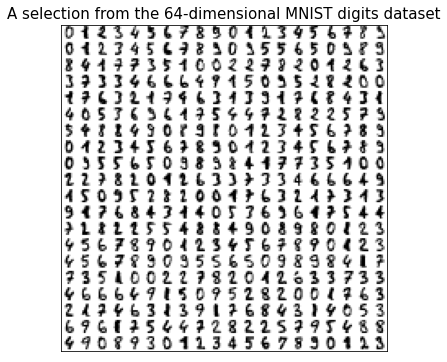

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from time import time

digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
        
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.rcParams['figure.figsize'] = [6, 6]
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional MNIST digits dataset', fontsize=15);

... computing IsoMap embedding


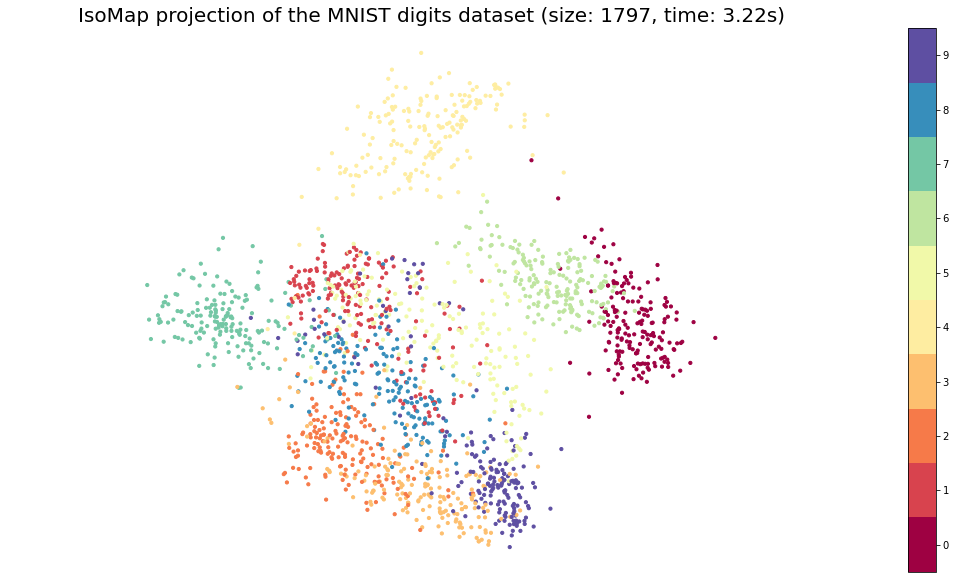

In [2]:
def scatterplot_digits(embedding, algorithm_name, time):
    plt.rcParams['figure.figsize'] = [19, 10]
    plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=10)
    plt.gca().set_aspect('equal', 'datalim')
    plt.axis('off')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(f'{algorithm_name} projection of MNIST digits dataset (size: {len(embedding)}, time: {round(time,2)}s)', fontsize=20);
    
print("... computing IsoMap embedding")
t0 = time()
X_iso = Isomap(n_neighbors=30, n_components=2).fit_transform(X)
scatterplot_digits(X_iso, 'IsoMap', time() - t0)

***

## Applicazione di ISOMAP al dataset Fashion-MNIST

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import os
import requests
from time import time

# se il dataset non è presente, lo scarico da opeml
if not os.path.isfile("fashion-mnist.csv"):
    csv_data = requests.get("https://www.openml.org/data/get_csv/18238735/phpnBqZGZ")
    with open("fashion-mnist.csv", "w") as f:
        f.write(csv_data.text)

source_df = pd.read_csv('fashion-mnist.csv')
samples = 5000

X = source_df.iloc[:samples, :784].values.astype(np.float32)
target = source_df['class'].values[:samples]

... computing IsoMap embedding


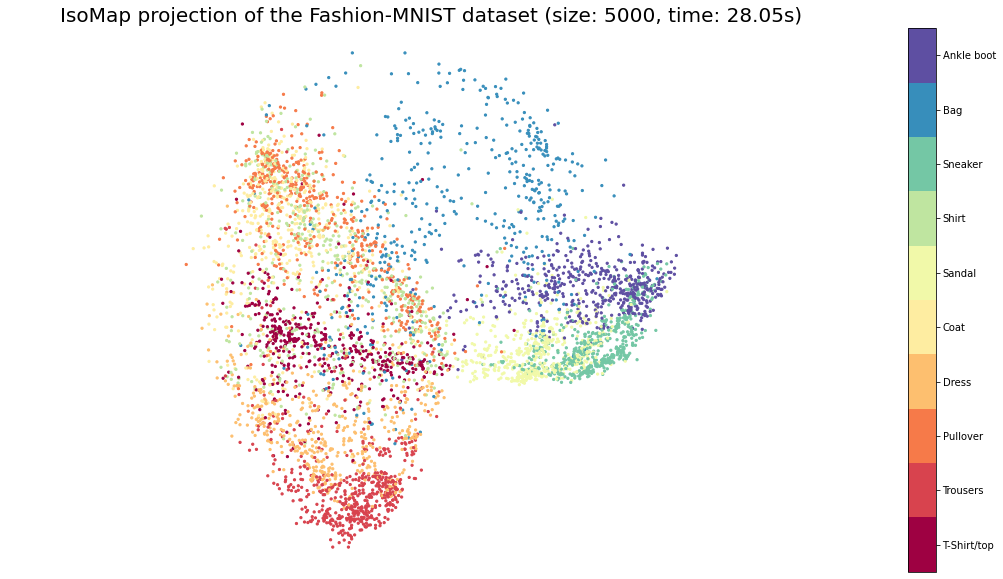

In [4]:
def scatterplot_fashion(embedding, algorithm_name, time):
    plt.rcParams['figure.figsize'] = [19, 10]
    plt.scatter(embedding[:, 0], embedding[:, 1], c=target[:], cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.axis('off')
    cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    cbar.ax.set_yticklabels(['T-Shirt/top', 'Trousers', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])    
    plt.title(f'{algorithm_name} projection of Fashion-MNIST dataset (size: {len(embedding)}, time: {round(time,2)}s)', fontsize=20);
    
print("... computing IsoMap embedding")
t0 = time()
X_iso = Isomap(n_neighbors=30, n_components=2).fit_transform(X)
scatterplot_fashion(X_iso, 'IsoMap', time() - t0)